In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/weather.csv")

features = data["Temperature (C)"]
labels = data["Humidity"][300:400]

x_ = features.mean()
s = features.std()

data["norm_temp"] = (features - x_)/s
features = data["norm_temp"][300:400]

In [3]:
def mse(preds,labels):
    loss = sum((preds-labels)**2)/len(preds)
    return loss

# -2 * (y - y') * x
def w_grad(w,labels,preds,features):
    gradient= (-2*(labels-preds)*features).mean()
    return gradient

# -2 * (y - y')
def b_grad(b,labels,preds):
    gradient= (-2*(labels-preds)).mean()
    return gradient

def update(var,grad,lr=0.00001):
    new_var = var - lr * grad

    return new_var

# y' = wx + b
def predict(w,b,features):
    preds = w*features + b
    return preds

y = []
x = []

In [4]:
w = np.random.randn()
b = np.random.randn()

print(w, b)

1.1164505202812378 1.3604786707691818


In [9]:
epochs = range(10000)
# forward pass --- backward pass


for epoch in epochs:
    preds = predict(w,b,features)
    loss = mse(preds, labels)

    weight_grad = w_grad(w,labels,preds,features) 
    bias_grad = b_grad(b,labels,preds)

    w = update(w,weight_grad,lr=0.001)
    b = update(b,bias_grad)

    if (epoch+1) % 10 == 0:
        y.append(loss)
        x.append(w)

    if (epoch+1) % 1000 == 0:
        print(loss)

0.10210438066530397
0.09919181949204997
0.09636552246396997
0.09362262455287103
0.09096056680390896
0.08837693568637568
0.08586941089562691
0.08343574746662005
0.08107376877054236
0.07878136299019743


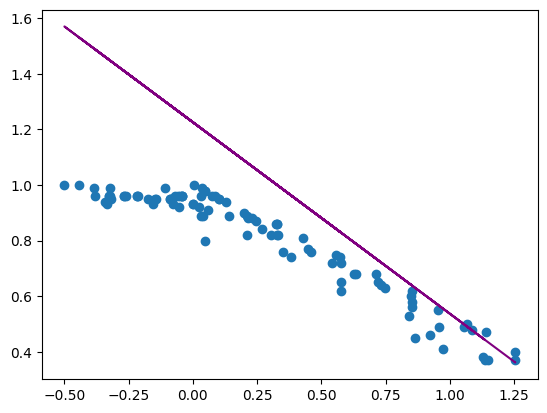

In [15]:
plt.scatter(x=features, y=labels)
plt.plot(features, preds, c="purple")

In [14]:
w = -0.29073122962236025
b = 0.8083818147607283

In [ ]:
plt.plot(x,y)
plt.show()

In [12]:
x = 27
x = (x - x_)/s

predict(w,b,x)

0.34975993103799863